In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import dask.dataframe as dd
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm


plt.rcParams['figure.figsize'] = (10.0, 8.0)


In [2]:
%reload_ext cythonmagic
%reload_ext cython

/home/saket/anaconda/lib/python2.7/site-packages/IPython/extensions/cythonmagic.py:21: UserWarning: The Cython magic has been moved to the Cython package
  warnings.warn("""The Cython magic has been moved to the Cython package""")


In [3]:
%%cython
import numpy as np

def marshall_palmer(ref, minutes_past):
    #minutes_past = df['minutes_past']

    minutes_in_segment = 60.0
    valid_time = minutes_past.diff()
    valid_time.iloc[0] = minutes_past.iloc[0]
    valid_time.iloc[-1] = valid_time.iloc[-1] + minutes_in_segment - np.sum(valid_time)
    valid_time = valid_time/60.0
    valid_time = valid_time[np.isfinite(ref)]
    ref = ref[np.isfinite(ref)]
    mmperhr = np.dot(pow(pow(10, ref/10)/200, 0.625), valid_time)
    return mmperhr

def operate_on_each_hour(hour):
    hour = hour.sort('minutes_past', ascending=True)
    gauge_estimate = marshall_palmer(hour['Ref'], hour['minutes_past'])
    #hour['gauge_estimated'] = gauge_estimate
    return gauge_estimate

In [4]:
#traindata = pd.read_csv('../data/train.csv')
#traindata = traindata.set_index('Id')
#traindata['estimated'] = traindata.groupby(traindata.index).apply(operate_on_each_hour)
#traindata['estimated']
# traindata.to_hdf('traindata_preprocessed.h5', 'traindata_preprocessed', format = 'fixed', mode='w', dropna=False, complevel=9)

In [5]:
"""
plt.rcParams['figure.figsize'] = (10.0, 8.0)
gauge_expected = [];
gauge_observed = [];

for groupname, group in groups:
    expected = marshall_palmer(group['Ref'], group['minutes_past'])
    observed = group['Expected'].mean()
    gauge_observed.append(observed)
    gauge_expected.append(expected)

plt.plot(gauge_expected, gauge_observed)
"""

"\nplt.rcParams['figure.figsize'] = (10.0, 8.0)\ngauge_expected = [];\ngauge_observed = [];\n\nfor groupname, group in groups:\n    expected = marshall_palmer(group['Ref'], group['minutes_past'])\n    observed = group['Expected'].mean()\n    gauge_observed.append(observed)\n    gauge_expected.append(expected)\n\nplt.plot(gauge_expected, gauge_observed)\n"

In [6]:
traindata = pd.read_hdf('traindata_preprocessed.h5')

count    13765201.000000
mean          108.626306
std           548.605805
min             0.010000
25%             0.254000
50%             1.016000
75%             3.810002
max         33017.730000
Name: Expected, dtype: float64

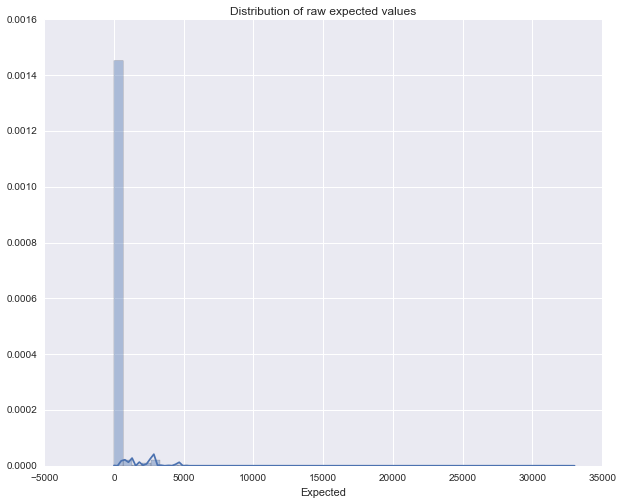

In [7]:
sns.distplot(traindata.Expected)
plt.title('Distribution of raw expected values')
traindata.Expected.describe()

count    12706866.000000
mean            2.971050
std             6.427779
min             0.010000
25%             0.254000
50%             0.762000
75%             2.540001
max            69.850040
Name: Expected, dtype: float64

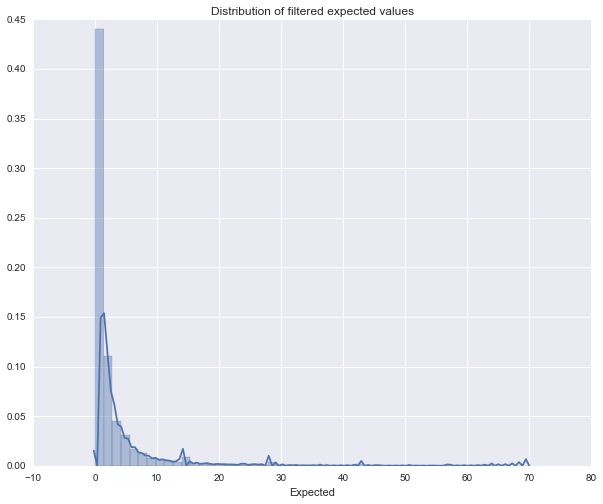

In [8]:
traindata = traindata[traindata.Expected<70]
sns.distplot(traindata.Expected)
plt.title('Distribution of filtered expected values')
traindata.Expected.describe()

/home/saket/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


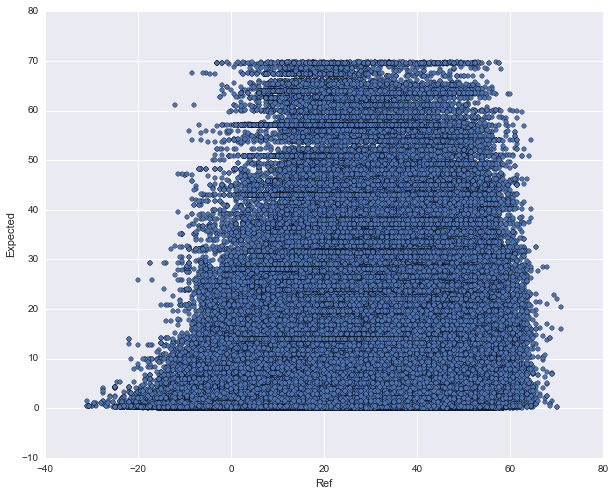

In [9]:
traindata.plot(kind='scatter', x='Ref', y='Expected')

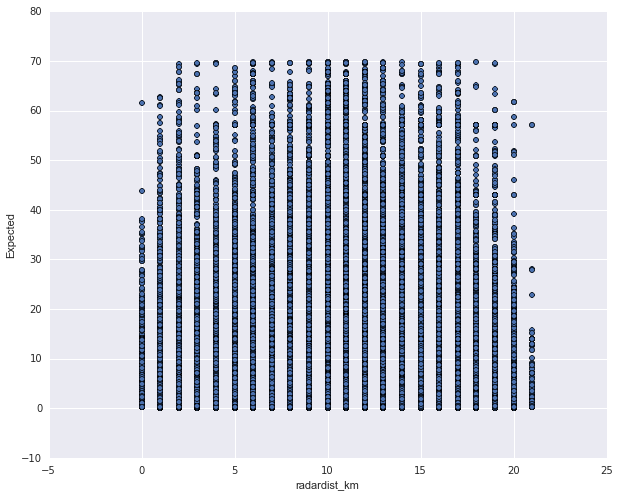

In [88]:
traindata.plot(kind='scatter', x='radardist_km', y='Expected')

In [92]:
columns = traindata.columns.values

In [93]:
columns

array(['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite',
       'RefComposite_5x5_10th', 'RefComposite_5x5_50th',
       'RefComposite_5x5_90th', 'RhoHV', 'RhoHV_5x5_10th',
       'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr', 'Zdr_5x5_10th',
       'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected', 'estimated'], dtype=object)

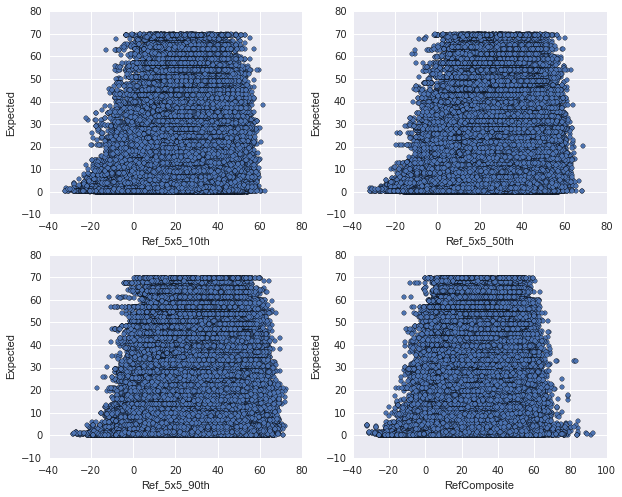

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2)
traindata.plot(kind='scatter', x='Ref_5x5_10th', y='Expected', ax=axes[0,0])
traindata.plot(kind='scatter', x='Ref_5x5_50th', y='Expected', ax=axes[0,1])
traindata.plot(kind='scatter', x='Ref_5x5_90th', y='Expected', ax=axes[1,0])
traindata.plot(kind='scatter', x='RefComposite', y='Expected', ax=axes[1,1])

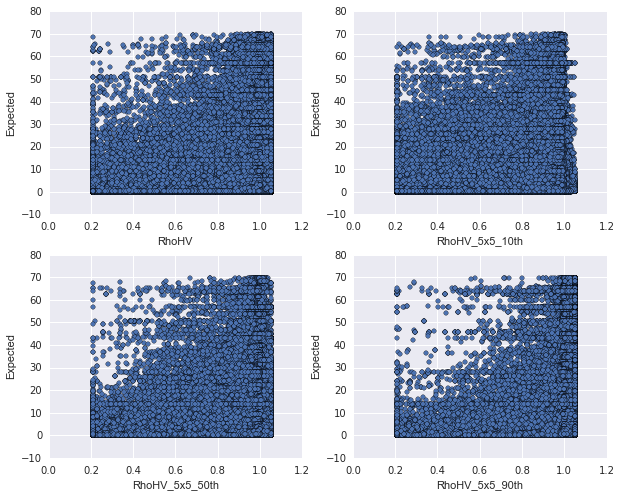

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2)
traindata.plot(kind='scatter', x='RhoHV', y='Expected', ax=axes[0,0])
traindata.plot(kind='scatter', x='RhoHV_5x5_10th', y='Expected', ax=axes[0,1])
traindata.plot(kind='scatter', x='RhoHV_5x5_50th', y='Expected', ax=axes[1,0])
traindata.plot(kind='scatter', x='RhoHV_5x5_90th', y='Expected', ax=axes[1,1])

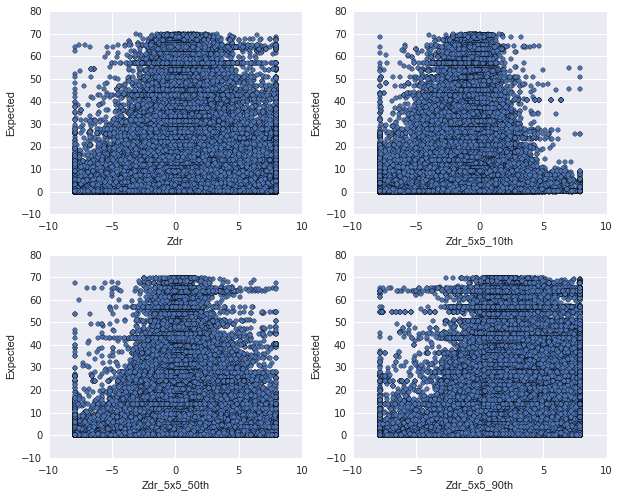

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2)
traindata.plot(kind='scatter', x='Zdr', y='Expected', ax=axes[0,0])
traindata.plot(kind='scatter', x='Zdr_5x5_10th', y='Expected', ax=axes[0,1])
traindata.plot(kind='scatter', x='Zdr_5x5_50th', y='Expected', ax=axes[1,0])
traindata.plot(kind='scatter', x='Zdr_5x5_90th', y='Expected', ax=axes[1,1])

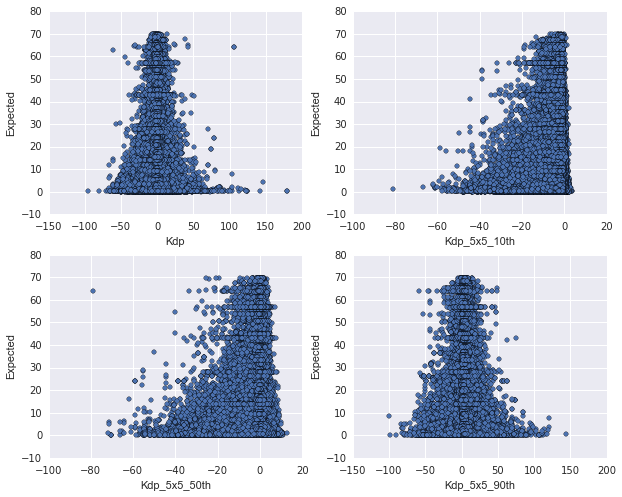

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=2)
traindata.plot(kind='scatter', x='Kdp', y='Expected', ax=axes[0,0])
traindata.plot(kind='scatter', x='Kdp_5x5_10th', y='Expected', ax=axes[0,1])
traindata.plot(kind='scatter', x='Kdp_5x5_50th', y='Expected', ax=axes[1,0])
traindata.plot(kind='scatter', x='Kdp_5x5_90th', y='Expected', ax=axes[1,1])

From the 
- _radardist_km_: From the graph above I do not see any strong relation between expected and radardist_km(All bars are uniform)
- _Ref_: Seems to be gaussian

- _Ref_5x5_10th_:  Gaussian

- Ref_5x5_50th:           Gaussian

- Ref_5x5_90th:           Gaussian

- RefComposite:           Gaussian

- RefComposite_5x5_10th:  Gaussian

- RefComposite_5x5_50th:  Gaussian

- RefComposite_5x5_90th:  Gaussian

- RhoHV:                      ?

- RhoHV_5x5_10th:             ?

- RhoHV_5x5_50th;             ?

- RhoHV_5x5_90th:             ?

- Zdr:                     Gaussian

- Zdr_5x5_10th:            Gaussian

- Zdr_5x5_50th:            Gaussian

- Zdr_5x5_90th:            Gaussian

- Kdp:                     Gaussian

- Kdp_5x5_10th:            Gaussian

- Kdp_5x5_50th:            Gaussian

- Kdp_5x5_90th:            Gaussian



In [7]:
testdata = pd.read_csv('../data/test.csv')
testdata.to_hdf('testdata.h5', 'testdata', format = 'fixed', mode='w', dropna=False, complevel=9)


In [8]:
testdata.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,1,1,8,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5,8,10.0,NaN,10,18.0,11.5,NaN,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,8,8,NaN,NaN,7,14.5,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,12,8,14.0,NaN,9,16.0,14.0,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,15,8,10.5,NaN,9,15.5,13.5,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
groups = traindata.groupby(traindata.index)
traindatamean = groups.mean()

In [62]:
model = sm.GLM.from_formula('Expected ~ Ref + Zdr + Kdp + radardist_km', data=traindatamean, family=sm.families.Gamma())
res = model.fit()

In [75]:
testdatagroups = testdata.groupby(testdata.index)
testdatamean = testdatagroups.aggregate([np.mean])

In [76]:
res2 = res.predict(testdatamean[['Ref', 'Zdr', 'Kdp', 'radardist_km']])

In [ ]:
string = "Id,Expected\n"
for i,x in enumerate(res2):
    string += '{},{}\n'.format(i+1,x)

with open('gaussian_results.txt','w') as f:
    f.write(string)

In [67]:
len(testdatagroups)

8022756

In [69]:
len(res2)/3

710335

In [71]:
testdatagroups.size()

0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
          ..
8022726    1
8022727    1
8022728    1
8022729    1
8022730    1
8022731    1
8022732    1
8022733    1
8022734    1
8022735    1
8022736    1
8022737    1
8022738    1
8022739    1
8022740    1
8022741    1
8022742    1
8022743    1
8022744    1
8022745    1
8022746    1
8022747    1
8022748    1
8022749    1
8022750    1
8022751    1
8022752    1
8022753    1
8022754    1
8022755    1
dtype: int64